# Sartorius: Manipulating Train Data

### Abstract

This is a subsection created to complete the Sartorious competition. Our team have decided to create extra sets of the train data images to increase the total number of images being trained by our model. Since there is a train csv file that contains the annotations for each of the images in this competition, we had applied the Right Angle Mirror Concept to duplicate the images and create its annotations at the same time.

### Introduction
One of the methods to increase the accuracy of on the test data results is by increasing the training data. In the train folder, there are a total of 606 images. The train csv file indicates that all of the images have the same 704 width and 520 height. Since the height and width are not the same, the Right Angle Mirror Concept was applied to create a reflection of the original images.

Based on the image formation in plane mirror article from Physics Classroom's website, each of the train image will create three extra sets of reflected images. The figure below is an example on how the concept is applied to the train image.

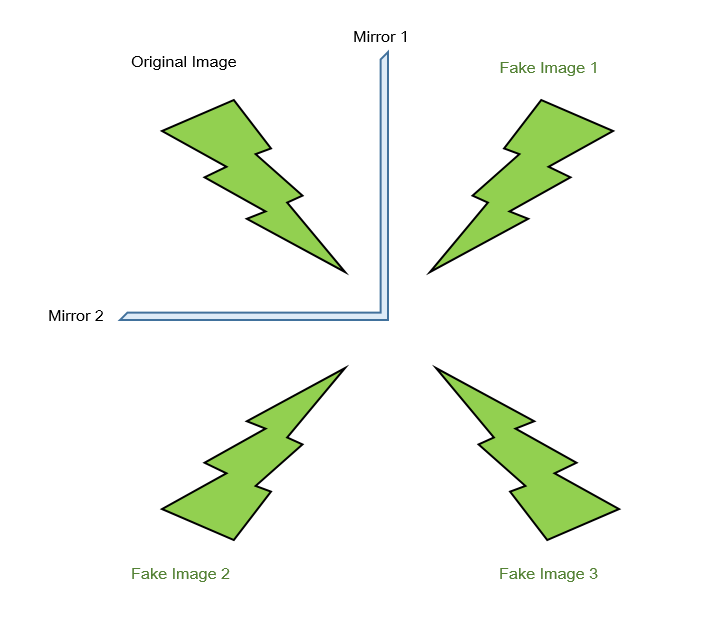

Imagine you have the original image on the top right corner with two plane mirror placed at 90 degree. With the two mirrors, there will be three extra 'fake' images created out of it. Thus, at the end of this section, we will have 3 sets of 'fake' images for each of the 606 original images.

### Import Relevant Packages
In this segment, all package which are needed to create the fake images are imported.


In [ ]:
import pandas as pd
import numpy as np
from cv2 import imread
from matplotlib import image
from matplotlib import pyplot

import PIL
from PIL import Image
print('Pillow Version: ', PIL.__version__)

### Manipulate Images
#### Part A: Sample Image Flipping
In this section, a sample image is used to have a better view on how the 'fake' images can be created. The original train images are not used in this section as the output images is much harder to identify the changes. All train images will be flipped in the Part B.

In [ ]:
# load the image
image = Image.open('../input/test-original-image/TEST_ori.PNG')

# load image as pixel array
data = imread('../input/test-original-image/TEST_ori.PNG')
# summarize shape of the pixel array
print(data.shape)

# display the array of pixels as an image
pyplot.imshow(data)
pyplot.show()

In [ ]:
# Horizontal flip (using Original Image) - Creating Fake Image 1
fi1 = image.transpose(Image.FLIP_LEFT_RIGHT)
# save in png format
fi1.save('TEST_fi1.png')
# load image as pixel array
data1 = imread('TEST_fi1.png')
# summarize shape of the pixel array
print(data1.shape)
# display the array of pixels as an image
pyplot.imshow(data1)
pyplot.show()

In [ ]:
# Vertical flip (using Original Image)- Creating Fake Image 2
fi2 = image.transpose(Image.FLIP_TOP_BOTTOM)
# save in png format
fi2.save('TEST_fi2.png')
# load image as pixel array
data2 = imread('TEST_fi2.png')
# summarize shape of the pixel array
print(data2.shape)
# display the array of pixels as an image
pyplot.imshow(data2)
pyplot.show()

In [ ]:
# Vertical flip (using Fake Image 1) - Creating Fake Image 3
fi3 = fi1.transpose(Image.FLIP_TOP_BOTTOM)
# save in png format
fi3.save('TEST_fi3.png')
# load image as pixel array
data3 = imread('TEST_fi3.png')
# summarize shape of the pixel array
print(data3.shape)
# display the array of pixels as an image
pyplot.imshow(data3)
pyplot.show()

In [ ]:
# View all images
axarr = pyplot.figure(figsize=(500,500))
f, axarr = pyplot.subplots(2,2)
axarr[0,0].imshow(data)
axarr[0,1].imshow(data1)
axarr[1,0].imshow(data2)
axarr[1,1].imshow(data3)


From the results above, the sample image is successfully flipped three times to create the fake image. A 'for' loop will be used in Part B to flip all the images.

#### Part B: Flip all Train Images

In [ ]:
# Import dataframe
df_train = pd.read_csv('../input/sartorius-cell-instance-segmentation/train.csv')
# Show the first few rows of the dataframe
df_train.head()

In [ ]:
# Get all the unique IDs
image_names = df_train['id'].unique()
print('First Three IDs: ', image_names[:3],
      '\nLength of Array: ', len(image_names))

In [ ]:
# Check if all the names of the images have the same length
# This will be helpful to change update the names later
for i in image_names:
    if len(i) != 12 :
        print('False')
print('All the same length!')

In [ ]:
# All Original Images will be save with original name + '0' (eg: '0030fd0e63780.png' is the new name for the original image)
# All Fake Image 1 will be save with original name + '1' (eg: '0030fd0e63781.png')
# All Fake Image 2 will be save with original name + '2' (eg: '0030fd0e63782.png')
# All Fake Image 3 will be save with original name + '3' (eg: '0030fd0e63783.png')

numstr = ['0', '1', '2', '3']
dirname = '../input/sartorius-cell-instance-segmentation/train/'
image_format = '.png'

for i in image_names :
    fpath = (dirname.__add__(i)).__add__(image_format)
    image = Image.open(fpath)
    
    # Horizontal flip (using Original Image) - Creating Fake Image 1
    fi1 = image.transpose(Image.FLIP_LEFT_RIGHT)
    # Vertical flip (using Original Image)- Creating Fake Image 2
    fi2 = image.transpose(Image.FLIP_TOP_BOTTOM)
    # Vertical flip (using Fake Image 1) - Creating Fake Image 3
    fi3 = fi1.transpose(Image.FLIP_TOP_BOTTOM)
    
    # save in png format
    image.save((i.__add__(numstr[0])).__add__(image_format))
    fi1.save((i.__add__(numstr[1])).__add__(image_format))
    fi2.save((i.__add__(numstr[2])).__add__(image_format))
    fi3.save((i.__add__(numstr[3])).__add__(image_format))
print('Complete!')

### Create Annotations

#### Part A: Create Functions - Expand & Shrink

In [ ]:
def expand(los) :
    '''
    This function will expand the counts original annotation in the file into its original pixels.
    Example: expand('100 2') -> [100 101]
    '''
    loi = list(map(int, los.split()))
    newlist = []

    loc = 0 # Current Location/ Index
    list_len = len(loi)

    while list_len > 0:
        count = 0
        while loi[loc+1] > 0:
            newlist.append(loi[loc] + count)
            count +=1
            loi[loc+1] -= 1
        loc += 2
        list_len -= 2
    return(newlist)

    
test1 = '100 1 150 3 189 5 197 4'
expand(test1)

In [ ]:
def shrink(loi):
    '''
    This function will shrink the pixels using count as per annotation.
    Example: shrink([100 101]) -> '100 2'
    '''
    newlist = [loi[0]]
    nl_loc = 0
    current = newlist[nl_loc]
    loi_loc = 1
    loi_len = len(loi)
    count = 1
    
    while loi_len > 0:   
        if loi_len == 1:
            newlist.append(count)
            
        if loi_len >1 and loi[loi_loc] - (current+count-1) ==  1:
            count += 1

        elif loi_len > 1 and loi[loi_loc] - (current+count-1) >  1:
            newlist.append(count)
            newlist.append(loi[loi_loc])
            nl_loc = len(newlist)-1
            current = newlist[nl_loc]
            count = 1
        
        loi_loc += 1
        loi_len -= 1
    return(" ".join(map(str,newlist)))

test2 = [1, 5, 100, 150, 151, 152, 189, 190, 191, 192, 193, 197, 198, 199, 200, 300]
shrink(test2)

#### Part B: Row & Column Min, Max
In this section, we will create list for column min, column max, row min and row max. Then, use the created list to search for the min max of a certain pixel, which is the find function.

Before creating the list, we need to check the pixel starts from 0 or 1.

In [ ]:
# Use the original annotations to see if the pixels starts from 1 to 366080 or from 0 to 366079.
alist = df_train.annotation[:]

for i in alist:
    if '366080' in i:
        print('It Exist!')
print('Done')

In [ ]:
# Use two empty lists to store the first values of each row and the last values of each row.
# These two lists will be used to create the annotation for the flip images.
row_min = []
row_max = []
height = 1
while height != 521:
    row_min.append(704*(height-1)+1)
    row_max.append(704*height)
    height += 1
    
# Print the last few values in each list
print(row_min[:5])
print(row_max[515:])

In [ ]:
# Use two empty lists to store the first values of each column and the last values of each column.
# These two lists will be used to create the annotation for the flip images.
col_min = []
col_max = []
width = 1
while width != 705:
    col_min.append(width)
    col_max.append(365377+width-1)
    width += 1
    
# Print the last four values in each list
print(col_min[700:])
print(col_max[:3])

In [ ]:
def find(number):
    '''
    Find the minimum and maximum values of each column and row, then return the list with these four values.
    Example : find(1) -> [1, 520, 1, 704]
    '''
    number -=1
    r = max(0, number//704)
    c = max(0, number%704)
    i =0
    for i in col_min:
        if number > i : 
            i += 1
        else: 
            i
    alist = [col_min[c], col_max[c], row_min[r], row_max[r]]
    return(alist)

print(find(1))
print(find(2))

Print same sample min max of columns and rows

In [ ]:
print('366080 = ', find(366080), '\n520 = ',find(520), '\n704 = ',find(704), '\n705 = ',find(705),)

#### Part C: Create Annotation for the fake images

In this section, the functions to create annotations for the fake images. We just needs functions for fake image 1 and fake image 2. The function for fake image 3 is much easier since it can be created using the first two functions.

In [ ]:
# Define constant variables
cmin = 0
cmax = 1
rmin = 2
rmax = 3

def fake1(los):
    '''
    Create annotation for fake image 1
    Example: fake1('1 2') -> '703 2'
    '''
    loi = expand(los)
    alist = []
    for i in loi :
        info = find(i)
        value = info[rmax] - i + info[rmin]
        alist.append(value)
    alist.sort()
    return shrink(alist)

test3 = '1 2 704 1 1000 3 366080 1'
fake1(test3)

In [ ]:
def fake2(los):
    '''
    Create annotation for fake image 2
    Example: fake1('1 2') -> '365377 2'
    '''
    loi = expand(los)
    alist = []
    for i in loi :
        info = find(i)
        value = info[cmax] - i + info[cmin]
        alist.append(value)
    alist.sort()
    return shrink(alist)

test4 = '1 2'
fake2(test4)

In [ ]:
def fake3 (los):
    temp = fake1(los)
    return fake2(temp)

fake3(test4)

In [ ]:
data0 = df_train[['id','annotation']]
print(data0)

In [ ]:
column_names = ["ID", "Annotation"]
df_rev = pd.DataFrame(columns = column_names)

for index, row in data0.iterrows():
    name = row['id']
    loc = row['annotation']
    
    for j in numstr:
        if j == '0':
            a_name = name+numstr[0]
            a_loc = loc
        if j == '1':
            a_name = name+numstr[1]
            a_loc = fake1(loc)
        if j == '2':
            a_name = name+numstr[2]
            a_loc = fake2(loc)
        if j == '3':
            a_name = name+numstr[3]
            a_loc = fake3(loc)
        df_rev = df_rev.append({'ID': a_name, 'Annotation': a_loc}, ignore_index=True)
print(df_rev)

In [ ]:
# saving the dataframe
df_rev.to_csv('newdf.csv')

### Reference
ThePhysicsClassroom. (2021).Reflection and the Ray Model of Light - Lesson 2 - Image Formation in Plane Mirrors. Retrieved on December 5, 2021,from https://www.physicsclassroom.com/class/refln/Lesson-2/Right-Angle-Mirrors